In [1]:
from MPF import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import timeit

In [2]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [3]:
iris_ds = datasets.load_iris()

X = iris_ds.data
y = iris_ds.target
f_names = iris_ds.feature_names

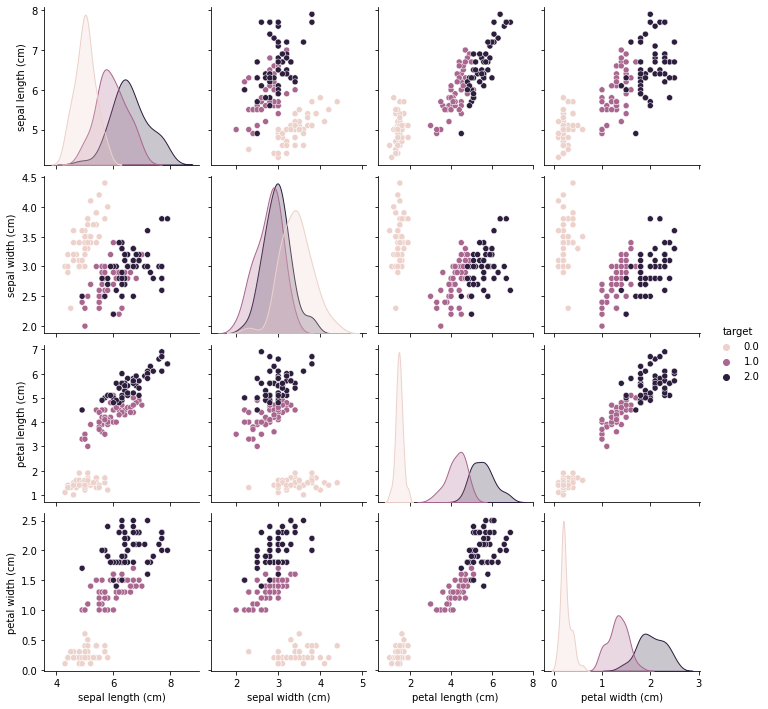

In [4]:
iris = pd.DataFrame(data= np.c_[iris_ds['data'], iris_ds['target']],
                     columns= iris_ds['feature_names'] + ['target'])
g = sns.pairplot(iris,hue='target')

In [5]:
mpf = MPF()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14)
mpf.fit(X_train, y_train,20)

In [6]:

pred = mpf.predict_array(X_test)
pred = mpf.predict_array_broadcast(X_test)
print(metrics.accuracy_score(pred,y_test))

0.9466666666666667


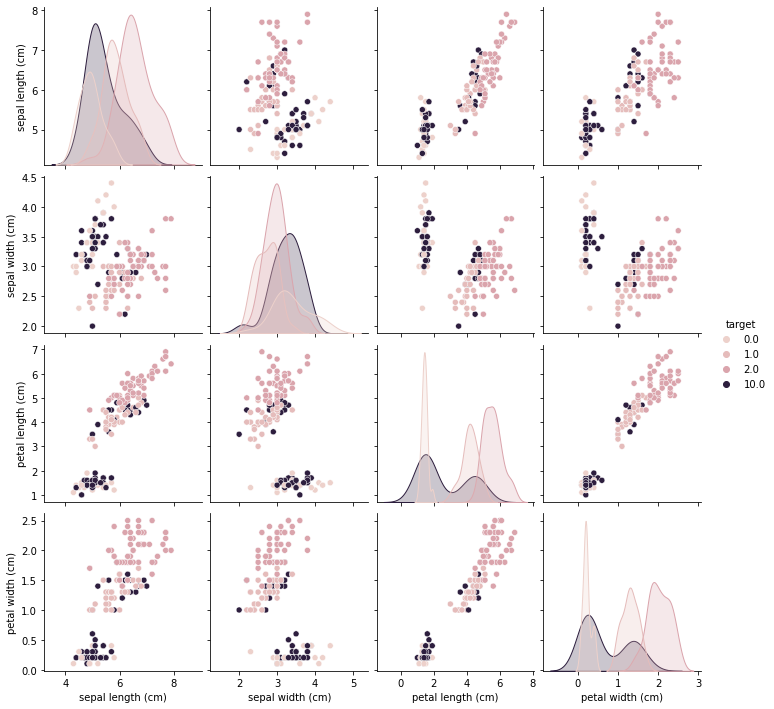

In [7]:
nz = mpf.zero_indexes
sns.color_palette("hls", 8)
iris_ds['target'][nz] = 10
iris_cor = pd.DataFrame(data= np.c_[iris_ds['data'], iris_ds['target']],
                     columns= iris_ds['feature_names'] + ['target'])
g = sns.pairplot(iris_cor,hue='target')

In [8]:
print("Count of reduced elems ", len(nz))

Count of reduced elems  45


In [9]:
knn = KNeighborsClassifier(n_neighbors = 2,weights = mpf.kernels['gauss'])

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2,
                     weights=<function gauss at 0x000002AA42C07C10>)

In [11]:
preds = knn.predict(X_test)
print(metrics.accuracy_score(preds, y_test))

0.9333333333333333


In [14]:
wrappedPred = wrapper(mpf.predict_array, X_test)
predTime = timeit.timeit(wrappedPred, number=1)

wrappedPredBroadcast = wrapper(mpf.predict_array_broadcast, X_test)
predBroadcastTime = timeit.timeit(wrappedPredBroadcast, number=1)
print(f"predict array without broadcast {predTime}")
print(f"predict array with broadcast {predBroadcastTime}")

predict array without broadcast 0.032025099999998474
predict array with broadcast 0.005317500000003861
